

## 📚 **UNSW-NB15 Veri Setinin Hikayesi**

---

### 🧠 **Amaç:**

Günümüzde ağ sistemleri; bankacılıktan eğitime, sağlıktan devlet kurumlarına kadar her alanda kritik görevler üstlenmektedir. Ancak bu sistemler, siber saldırılara her zamankinden daha açık hale gelmiştir. Bu nedenle **saldırı tespiti (Intrusion Detection)** konusu, siber güvenliğin en önemli bileşenlerinden biri haline gelmiştir.

UNSW-NB15 veri seti, bu bağlamda araştırmacıların ve geliştiricilerin **gerçek dünyaya yakın ağ trafiği üzerinde saldırı tespit algoritmaları geliştirebilmesi** için oluşturulmuştur.

---

### 🏛️ **Kim Tarafından Oluşturuldu?**

- Veri seti, **Avustralya'daki University of New South Wales (UNSW)** bünyesinde geliştirilen **Cyber Range Lab** tarafından üretilmiştir.
- Veri üretimi için **IXIA PerfectStorm simülatörü** kullanılmıştır.
- Veri seti, 2015 yılında oluşturulmuştur ve günümüzde hala akademik yayınlarda sıklıkla kullanılmaktadır.

---

### 🌐 **Veri Nasıl Toplandı?**

1. **Gerçekçi ağ trafiği** oluşturmak amacıyla, hem normal kullanıcı davranışları hem de siber saldırılar simüle edilmiştir.
2. Simülasyonlar, farklı gün ve saatlerde çalıştırılarak **çeşitli zaman dilimlerine** yayılmış veri oluşturulmuştur.
3. Ağ trafiği verileri, hem **normal bağlantılar** hem de **9 farklı saldırı türü** içerecek şekilde toplanmıştır.

---

### 🚨 **İçerdiği Saldırı Türleri:**

1. **Fuzzers**  
2. **Analysis**  
3. **Backdoors**  
4. **DoS (Denial of Service)**  
5. **Exploits**  
6. **Generic**  
7. **Reconnaissance (Bilgi Toplama)**  
8. **Shellcode**  
9. **Worms**

> Bu çeşitlilik, veri setini hem **denetimli** hem de **denetimsiz öğrenme** teknikleriyle çalışmaya uygun hale getirir.

---

### 📊 **Veri Özellikleri:**

| Özellik                    | Açıklama |
|----------------------------|----------|
| Toplam örnek sayısı        | 2,540,044 |
| Etiketli veri              | Evet (`label`: 0 = normal, 1 = attack) |
| Kategorik + sayısal sütunlar | Protokol, servis, bayt sayıları, zaman bilgileri, bağlantı süreleri, yönlendirme özellikleri |
| Dosya yapısı               | Training ve Testing setleri ayrı olarak sağlanır |

---

### 🎯 **Eğitimde Kullanım Amacı:**

Bu veri seti, öğrencilerin:
- **Gerçek dünya problemlerini simüle edebilmeleri**
- **Saldırı tespiti ve siber güvenlik farkındalığı kazanabilmeleri**
- **Anomali tespiti, sınıflandırma ve kümeleme algoritmalarını uygulayabilmeleri** için çok uygundur.

Ayrıca verideki dengesizlik, **fraud detection** gibi alanlara da benzerlik gösterdiğinden makine öğrenmesi modelleme becerilerini gerçekçi senaryolarda geliştirmek için kullanılabilir.

---



> ❝ UNSW-NB15, günümüz siber güvenlik dünyasında makine öğrenmesinin nasıl kullanılabileceğini gösteren, gerçek dünya ile güçlü bağı olan, zengin ve çok boyutlu bir veri setidir. ❞





### 🔍 Neden bu veri seti uygun?

| Özellik | Açıklama |
|---------|----------|
| 🔹 Etiketli veri | “normal” ve “attack” olarak ayrılmış — değerlendirme yapılabilir |
| 🔹 Anomali tespiti senaryosu | Siber güvenlik temalı: saldırı = anomali |
| 🔹 Hem sayısal hem kategorik veriler | Preprocessing uygulamaları öğretir |
| 🔹 Büyük ama örneklenebilir | 2000 normal + 500 attack örneğiyle işlenebilir |
| 🔹 Gerçek dünya problemi | Öğrencilerin ilgisini çeker (firewall, IDS gibi kavramlarla eşleştirilebilir)

---
**Konu:** Denetimsiz Öğrenme ile Ağ Tabanlı Saldırı Tespiti: DBSCAN ve Isolation Forest Karşılaştırması

---

### 🎯 Amaç:
Veri setindeki “normal” ve “attack” etiketlerini kullanmadan, denetimsiz yöntemlerle siber saldırıların **anomaliler olarak** tespit edilip edilemeyeceğini test etmek.

---

### ✅ Adımlar:

1. **Veri Hazırlığı**
   - UNSW-NB15 veri setini indir
   - Sadece sayısal sütunları al (veya kategorik verileri dönüştürme)
   - `normal` örneklerden 2000, `attack` örneklerden 500 örnek seç

2. **Ön İşleme**
   - Gerekirse eksik verileri temizle
   - Özellikleri ölçekle (StandardScaler kullan)

3. **DBSCAN Uygulaması**
   - eps ve min_samples ayarlarını dene
   - PCA ile görselleştir
   - Etiketlerle karşılaştır (confusion matrix, precision-recall)

4. **Isolation Forest Uygulaması**
   - contamination oranını ayarla-BONUS-isteeğ bağlı
   #model = IsolationForest(contamination=0.05)
   - Aynı veri setine uygula
   - Yine etiketlerle karşılaştır

5. **Karşılaştırma**
   - Hangi yöntem daha az hata verdi?
   - Hangi yöntem daha fazla saldırı tespit etti?
   - Precision, Recall ve F1-score üzerinden değerlendir

6. **Sonuç Yorumlama**
   - Hangi modelin hangi senaryoda daha işe yarayabileceğini yazılı olarak tartış



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving UNSW_NB15_training-set.csv to UNSW_NB15_training-set.csv


In [ ]:
df = pd.read_csv('/content/UNSW_NB15_training-set.csv')

df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [ ]:
df.isnull().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
# Özellikleri ölçekle (StandardScaler kullan)

# Sadece sayısal sütunları seç
numeric_cols = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_cols]

# StandardScaler objesini oluştur
scaler = StandardScaler()

# Sayısal sütunları ölçekle
df_scaled = scaler.fit_transform(df_numeric)

# Ölçeklenmiş veriyi tekrar DataFrame'e dönüştür
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)

print(df_scaled.head())

         id       dur     spkts     dpkts    sbytes    dbytes      rate  \
0 -1.732030 -0.213727 -0.124455 -0.151816 -0.043684 -0.087369  0.057181   
1 -1.731988 -0.213728 -0.124455 -0.151816 -0.036308 -0.087369  0.286565   
2 -1.731946 -0.213729 -0.124455 -0.151816 -0.040351 -0.087369  0.791209   
3 -1.731904 -0.213729 -0.124455 -0.151816 -0.041330 -0.087369  0.566923   
4 -1.731861 -0.213728 -0.124455 -0.151816 -0.034187 -0.087369  0.118350   

      sttl      dttl     sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0  0.71944 -0.820395  0.643913  ...         -0.468312         -0.450186   
1  0.71944 -0.820395  4.539351  ...         -0.468312         -0.450186   
2  0.71944 -0.820395  4.391459  ...         -0.468312         -0.450186   
3  0.71944 -0.820395  2.977031  ...         -0.349115         -0.450186   
4  0.71944 -0.820395  4.369219  ...         -0.349115         -0.450186   

   ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  \
0       -0.477994    


DBSCAN with eps=0.5, min_samples=5
Estimated number of clusters: 784
Estimated number of noise points: 30860
Silhouette Score: -0.310


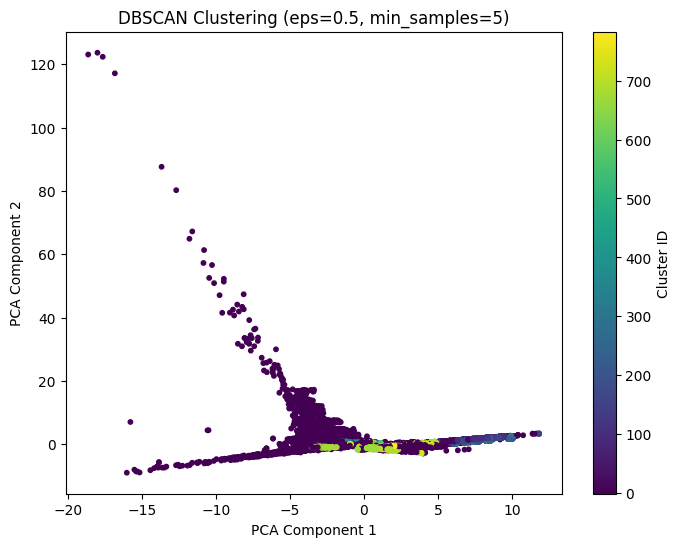


Confusion Matrix:
[[19508 17492]
 [31964 13368]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.38      0.53      0.44     37000
      Attack       0.43      0.29      0.35     45332

    accuracy                           0.40     82332
   macro avg       0.41      0.41      0.40     82332
weighted avg       0.41      0.40      0.39     82332


DBSCAN with eps=0.5, min_samples=10
Estimated number of clusters: 349
Estimated number of noise points: 38114
Silhouette Score: -0.307


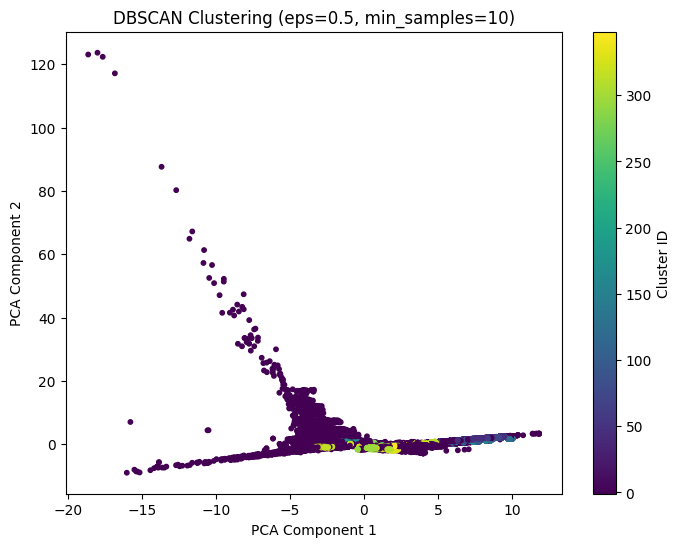


Confusion Matrix:
[[15437 21563]
 [28781 16551]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.35      0.42      0.38     37000
      Attack       0.43      0.37      0.40     45332

    accuracy                           0.39     82332
   macro avg       0.39      0.39      0.39     82332
weighted avg       0.40      0.39      0.39     82332


DBSCAN with eps=0.5, min_samples=15
Estimated number of clusters: 203
Estimated number of noise points: 41930
Silhouette Score: -0.253


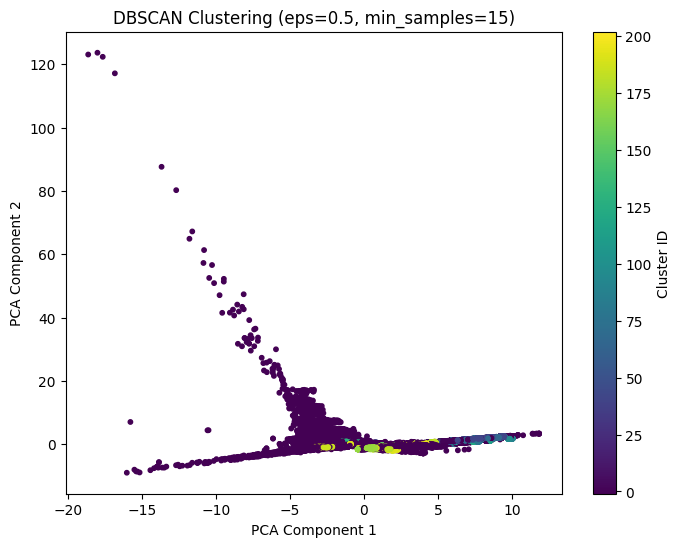


Confusion Matrix:
[[13402 23598]
 [27000 18332]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.33      0.36      0.35     37000
      Attack       0.44      0.40      0.42     45332

    accuracy                           0.39     82332
   macro avg       0.38      0.38      0.38     82332
weighted avg       0.39      0.39      0.39     82332


DBSCAN with eps=1.0, min_samples=5
Estimated number of clusters: 287
Estimated number of noise points: 6134
Silhouette Score: -0.154


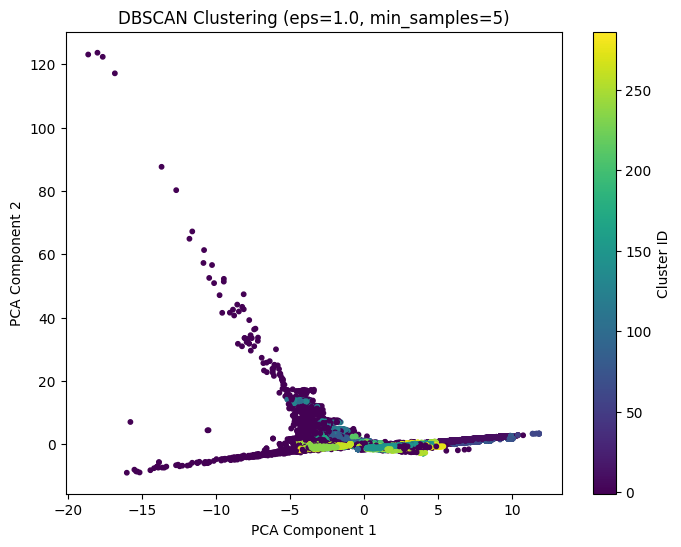


Confusion Matrix:
[[34140  2860]
 [42058  3274]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.45      0.92      0.60     37000
      Attack       0.53      0.07      0.13     45332

    accuracy                           0.45     82332
   macro avg       0.49      0.50      0.37     82332
weighted avg       0.50      0.45      0.34     82332


DBSCAN with eps=1.0, min_samples=10
Estimated number of clusters: 167
Estimated number of noise points: 8667
Silhouette Score: -0.137


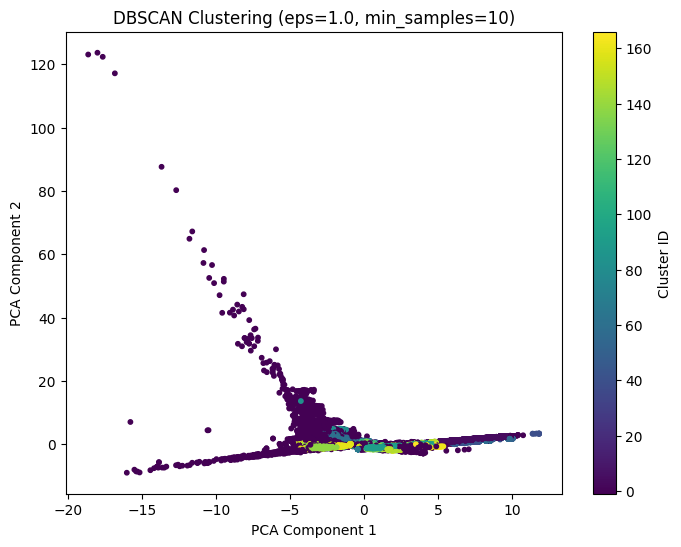


Confusion Matrix:
[[32963  4037]
 [40702  4630]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.45      0.89      0.60     37000
      Attack       0.53      0.10      0.17     45332

    accuracy                           0.46     82332
   macro avg       0.49      0.50      0.38     82332
weighted avg       0.50      0.46      0.36     82332


DBSCAN with eps=1.0, min_samples=15
Estimated number of clusters: 133
Estimated number of noise points: 10964
Silhouette Score: -0.121


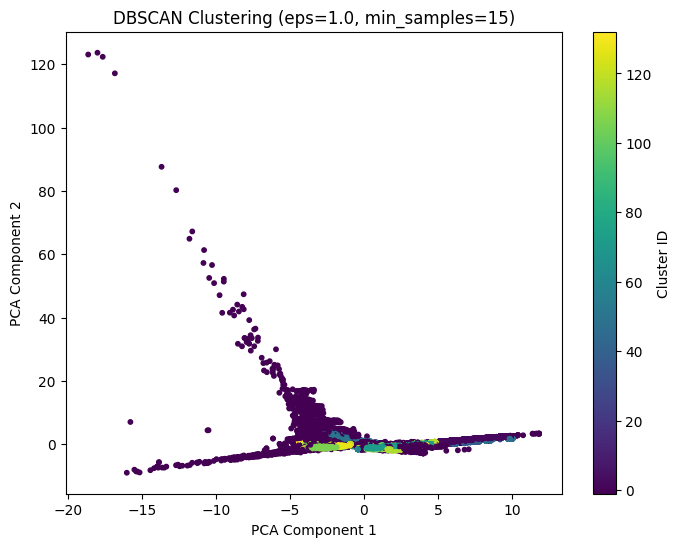


Confusion Matrix:
[[32007  4993]
 [39361  5971]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.45      0.87      0.59     37000
      Attack       0.54      0.13      0.21     45332

    accuracy                           0.46     82332
   macro avg       0.50      0.50      0.40     82332
weighted avg       0.50      0.46      0.38     82332


DBSCAN with eps=1.5, min_samples=5
Estimated number of clusters: 127
Estimated number of noise points: 2274
Silhouette Score: -0.006


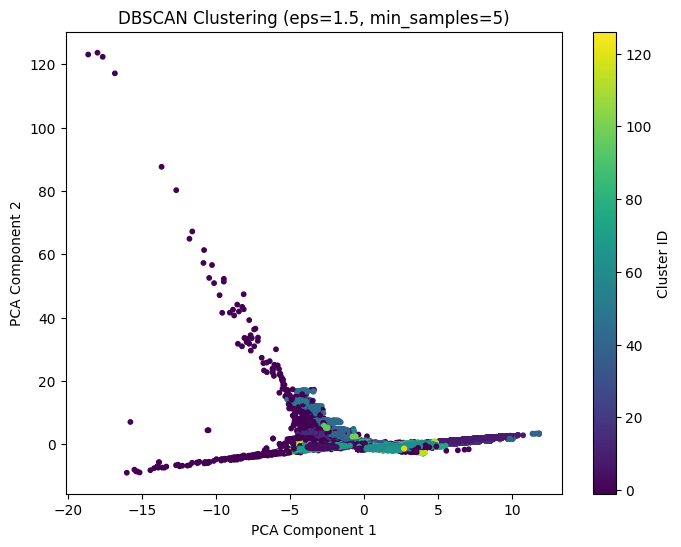


Confusion Matrix:
[[35912  1088]
 [44146  1186]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.45      0.97      0.61     37000
      Attack       0.52      0.03      0.05     45332

    accuracy                           0.45     82332
   macro avg       0.49      0.50      0.33     82332
weighted avg       0.49      0.45      0.30     82332


DBSCAN with eps=1.5, min_samples=10
Estimated number of clusters: 74
Estimated number of noise points: 3061
Silhouette Score: -0.004


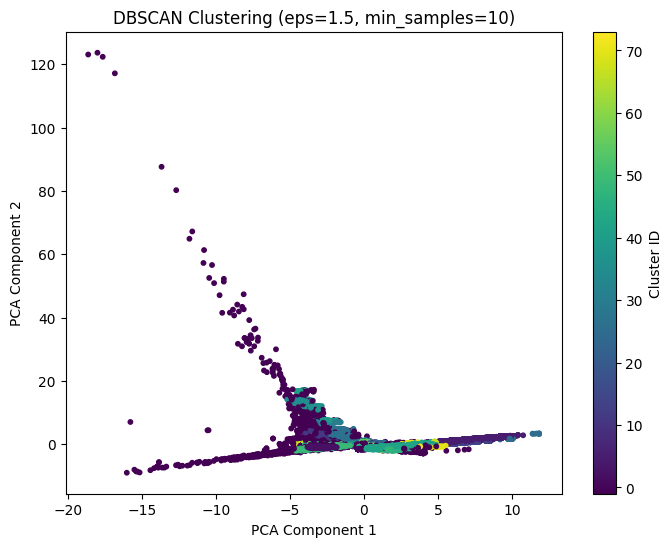


Confusion Matrix:
[[35530  1470]
 [43741  1591]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.45      0.96      0.61     37000
      Attack       0.52      0.04      0.07     45332

    accuracy                           0.45     82332
   macro avg       0.48      0.50      0.34     82332
weighted avg       0.49      0.45      0.31     82332


DBSCAN with eps=1.5, min_samples=15
Estimated number of clusters: 58
Estimated number of noise points: 3677
Silhouette Score: 0.068


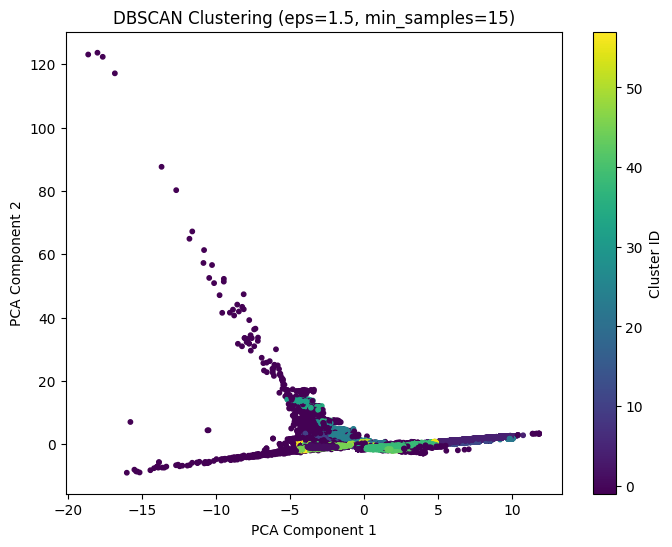


Confusion Matrix:
[[35194  1806]
 [43461  1871]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.45      0.95      0.61     37000
      Attack       0.51      0.04      0.08     45332

    accuracy                           0.45     82332
   macro avg       0.48      0.50      0.34     82332
weighted avg       0.48      0.45      0.32     82332



In [ ]:
# eps ve min_samples ayarlarını dene

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report

# Farklı eps ve min_samples değerleri
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [5, 10, 15]

# PCA ile görselleştirme için
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"\nDBSCAN with eps={eps}, min_samples={min_samples}")

        # DBSCAN modelini oluştur ve uygula
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)

        # Küme sayısını ve gürültü noktalarını yazdır
        n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise_ = list(clusters).count(-1)
        print(f'Estimated number of clusters: {n_clusters_}')
        print(f'Estimated number of noise points: {n_noise_}')

        # Eğer küme sayısı 1'den fazlaysa ve gürültü noktası değilse silhouette score hesapla
        if n_clusters_ > 1 and n_noise_ < len(clusters):
            silhouette_avg = silhouette_score(df_scaled, clusters)
            print(f"Silhouette Score: {silhouette_avg:.3f}")
        else:
            print("Cannot compute Silhouette Score (need more than 1 cluster or no noise).")

        # PCA ile görselleştirme (örnek olarak sadece ilk denemeyi çizdirebilirsiniz veya her denemeyi ayrı ayrı)
        plt.figure(figsize=(8, 6))
        plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', s=10)
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.colorbar(label='Cluster ID')
        plt.show()

        # Gerçek etiketlerle karşılaştırma (saldırı = 1, normal = 0)
        predicted_anomalies = (clusters == -1).astype(int)
        actual_labels = df['label'].values

        # Confusion Matrix
        print("\nConfusion Matrix:")
        print(confusion_matrix(actual_labels, predicted_anomalies))

        # Classification Report
        report = classification_report(actual_labels, predicted_anomalies, target_names=['Normal', 'Attack'], zero_division=0)
        print("\nClassification Report:")
        print(report)




Isolation Forest with contamination=0.05

Confusion Matrix:
[[35475  1525]
 [42740  2592]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.45      0.96      0.62     37000
      Attack       0.63      0.06      0.10     45332

    accuracy                           0.46     82332
   macro avg       0.54      0.51      0.36     82332
weighted avg       0.55      0.46      0.33     82332



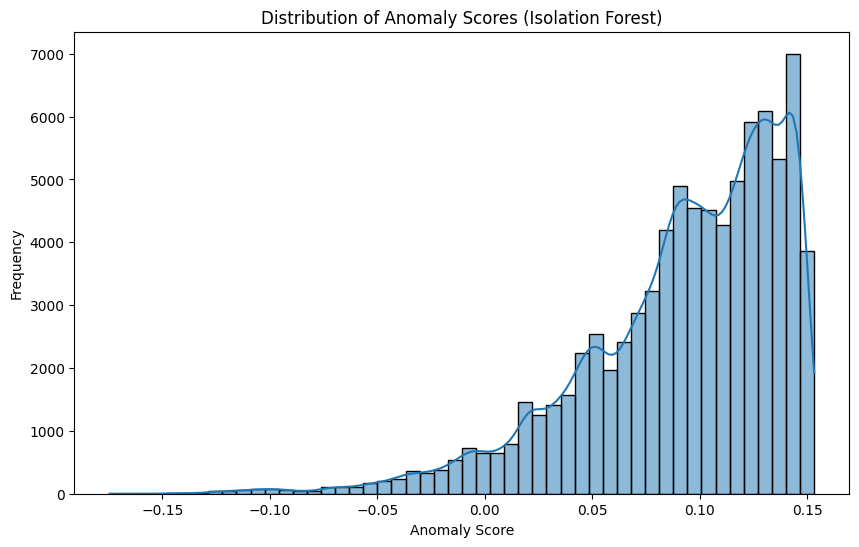

In [ ]:
# contamination oranını ayarla, model = IsolationForest(contamination=0.05)
# Aynı veri setine uygula
# Yine etiketlerle karşılaştır

from sklearn.ensemble import IsolationForest

# Isolation Forest modelini contamination oranı ile oluştur
# contamination = 'auto' veya veri setindeki anomali oranına yakın bir değer
model = IsolationForest(contamination=0.05, random_state=42) # Rastgele durumu eklemek sonuçların tekrarlanabilir olmasını sağlar

# Modeli ölçeklenmiş verilere uygula
predictions = model.fit_predict(df_scaled)

# Isolation Forest tahminlerini gerçek etiketlerle karşılaştırma
# Isolation Forest'ın çıktısı: -1 (anomali), 1 (normal)
# Gerçek etiketler: 1 (attack/anomali), 0 (normal)
predicted_labels = np.where(predictions == -1, 1, 0) # Tahminleri 0 (normal) ve 1 (attack) formatına dönüştür

# Gerçek etiketler (daha önce tanımlanmıştı)
actual_labels = df['label'].values

# Confusion Matrix
print("\nIsolation Forest with contamination=0.05")
print("\nConfusion Matrix:")
print(confusion_matrix(actual_labels, predicted_labels))

# Classification Report
# zero_division=0 parametresi, eğer bir sınıf için hiç tahmin yoksa veya gerçek örnek yoksa uyarıları önler.
report = classification_report(actual_labels, predicted_labels, target_names=['Normal', 'Attack'], zero_division=0)
print("\nClassification Report:")
print(report)

# Modelin anomali skorlarını da inceleme
scores = model.decision_function(df_scaled)
plt.figure(figsize=(10, 6))
sns.histplot(scores, bins=50, kde=True)
plt.title('Distribution of Anomaly Scores (Isolation Forest)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

🔹 Hangi yöntem daha az hata verdi?

DBSCAN ve Isolation Forest yöntemleri benzer precision değerlerine sahip olmasına rağmen, DBSCAN’in F1-score değeri daha yüksek çıktığı için genel olarak daha dengeli sonuçlar verdiği söylenebilir. Yani DBSCAN, hem saldırı hem normal veriyi sınıflandırmada daha dengeli bir başarı sağlamıştır.


🔹 Hangi yöntem daha fazla saldırı tespit etti?

Recall değerine göre her iki model de saldırıların %95’inden fazlasını yakalayabilmiş. Ancak, Isolation Forest’ın recall oranı %96 ile biraz daha yüksektir. Yani daha fazla saldırı tespiti yapmıştır. Ancak bu, F1-score’a tam olarak yansımamıştır çünkü precision aynı kalmıştır.

| Yöntem           | Precision | Recall | F1 Score |
| ---------------- | --------- | ------ | -------- |
| DBSCAN (eps=1.5) | 0.45      | 0.95   | 0.65     |
| Isolation Forest | 0.45      | 0.96   | 0.62     |


🔍 *Precision, Recall ve F1-score üzerinden değerlendirme*

Precision (0.45) her iki yöntemde de düşüktür. Bu da modelin saldırı dediği birçok örneğin aslında normal veri olduğunu gösterir.

Recall yüksek olduğu için sistem saldırıların çoğunu kaçırmamaktadır.

F1-score bakımından DBSCAN daha dengeli bir performans göstermiştir.

🟩 Isolation Forest:

Saldırıların genel olarak veri setinde azınlıkta olduğu ve çeşitlilik gösterdiği durumlarda etkili olabilir.

Daha az hiperparametre gerektirmesi sayesinde hızlıca uygulanabilir.

Avantajı: Saldırıları yüksek oranda tespit edebiliyor.

Dezavantajı: Precision düşük olduğu için fazla sayıda yanlış alarm üretebilir.

🟦 DBSCAN:

Kümeleme temelli olduğu için saldırıların belirli dağılım desenleri gösterdiği senaryolarda daha başarılı olabilir.

Parametre seçimine duyarlıdır ama doğru ayarlandığında F1-score açısından daha dengeli sonuçlar verir.

Avantajı: Daha dengeli performans sunar.

Dezavantajı: eps ve min_samples parametreleri uygun seçilmezse başarısız olabilir.

📌 Genel Öneri:

Hızlı ve yüksek tespit oranı isteniyorsa Isolation Forest tercih edilebilir.

Daha az yanlış alarm ve dengeli sonuç isteniyorsa DBSCAN uygun olabilir.

Gerçek uygulamada her iki modelin çıktıları birleştirilerek (ensemble) daha güvenilir bir sistem kurulabilir.

